<a href="https://colab.research.google.com/github/lt33tx/Landon_Tinch_DTSC3020_Fall2025-/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Imports for data handling, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

# Define dataset column names
col_names = [
    'parents', 'has_nurs', 'form', 'children', 'housing',
    'finance', 'social', 'health', 'target_class'
]

Question 1: Load the nursery dataset

In [24]:

# Read the dataset and assign column names
df = pd.read_csv('nursery.data', header=None, names=col_names)

# Display key dataset information
print("\nDataset Info:")
df.info()

# Check for and display any missing values
print("\nMissing Values:")
print(df.isnull().sum().to_string())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   parents       12960 non-null  object
 1   has_nurs      12960 non-null  object
 2   form          12960 non-null  object
 3   children      12960 non-null  object
 4   housing       12960 non-null  object
 5   finance       12960 non-null  object
 6   social        12960 non-null  object
 7   health        12960 non-null  object
 8   target_class  12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB

Missing Values:
parents         0
has_nurs        0
form            0
children        0
housing         0
finance         0
social          0
health          0
target_class    0


Question 2: Print the shape of the data

In [7]:
print(f"Shape (Rows, Columns): {df.shape}")

Shape (Rows, Columns): (12960, 9)


Question 3: What is the distribution of class values?  Provide a bar chart visualization of class frequencies.?



Class Percentage Distribution:
target_class
not_recom     33.33 %
priority      32.92 %
spec_prior     31.2 %
very_recom     2.53 %
recommend      0.02 %
Name: proportion, dtype: object


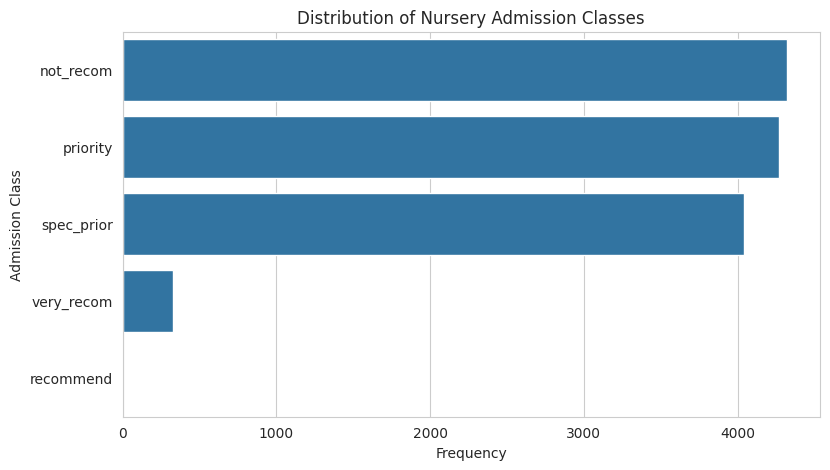

In [25]:
# Calculate the percentage distribution of the target variable
class_dist = df['target_class'].value_counts(normalize=True) * 100

# Print the class distribution percentages
print("Class Percentage Distribution:")
print(class_dist.round(2).astype(str) + ' %')

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='target_class', order=df['target_class'].value_counts().index)
plt.title('Distribution of Nursery Admission Classes')
plt.xlabel('Frequency')
plt.ylabel('Admission Class')
plt.show()

Question 4: What are the target class values?



In [26]:
# Get and store the unique labels from the target column
target_labels = df['target_class'].unique()

# Print the identified unique class labels
print("Unique Target Class Labels:")
print(target_labels)

Unique Target Class Labels:
['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior']


Question 5: Split the data into training (80%) and testing (20%)



In [27]:
# Separate features (X) and target (y)
X = df.drop('target_class', axis=1)
y = df['target_class']

# Encode features (X) to numerical values
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Encode target variable (y) to numerical integers
encoder_y = OrdinalEncoder()
y_encoded = encoder_y.fit_transform(y.values.reshape(-1, 1)).ravel().astype(int)

# Store original target names for the final report
target_names = encoder_y.categories_[0]

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Print the size of the resulting sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Target classes defined for report: {target_names}")

Training set size: 10368 samples
Testing set size: 2592 samples
Target classes defined for report: ['not_recom' 'priority' 'recommend' 'spec_prior' 'very_recom']


Question 6: Train a Naive Bayes model



In [20]:

cnb = CategoricalNB()
cnb.fit(X_train, y_train)


CategoricalNB()

Question 7: Evaluate training and test performance



Test Accuracy: 0.9059

Classification Report (Precision, Recall, F1-score for each class):
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.83      0.90      0.86       853
   recommend       0.00      0.00      0.00         0
  spec_prior       0.89      0.88      0.89       809
  very_recom       0.75      0.05      0.09        66

    accuracy                           0.91      2592
   macro avg       0.69      0.57      0.57      2592
weighted avg       0.90      0.91      0.90      2592



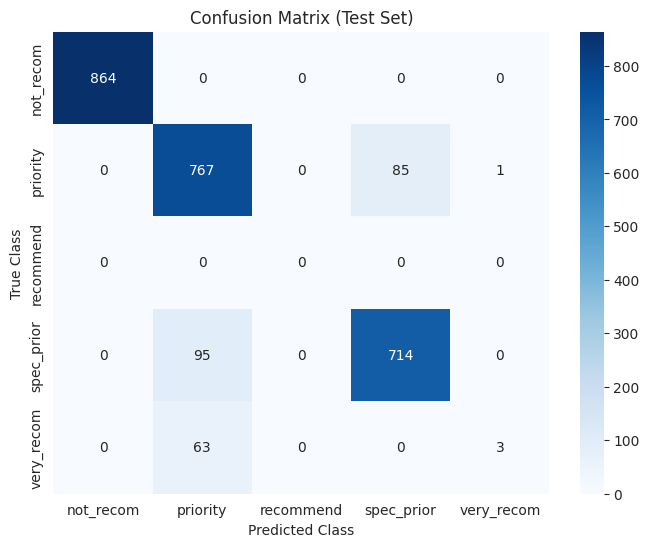

In [28]:
# Assuming 'cnb' is the trained CategoricalNB model
# cnb = CategoricalNB()
# cnb.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = cnb.predict(X_test)

# Get all possible integer labels for the report/matrix
full_integer_labels = np.unique(y_encoded)

# Calculate and print the overall accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate and print the detailed classification report
print("\nClassification Report (Precision, Recall, F1-score for each class):")
print(classification_report(
    y_test,
    y_test_pred,
    labels=full_integer_labels,
    target_names=target_names,
    zero_division=0
))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=full_integer_labels) # Use labels here too for consistency

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=target_names, yticklabels=target_names
)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()